<a href="https://colab.research.google.com/github/KennethV322/unsupervised-predict-streamlit-template/blob/master/Movie_recV11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS
import re
import string
import nltk
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy.
import matplotlib.pyplot as plt
import seaborn as sns
# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install scikit-surprise

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_imdb_data = pd.read_csv('imdb_data.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

In [42]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
df_test.head()

,userId,movieId
0,1,2011.0
1,1,4144.0
2,1,5767.0
3,1,6711.0
4,1,7318.0


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
df_test.head()

,userId,movieId
0,1,2011.0
1,1,4144.0
2,1,5767.0
3,1,6711.0
4,1,7318.0


In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09


In [ ]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035792 entries, 0 to 1035791
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1035792 non-null  int64  
 1   movieId    1035792 non-null  int64  
 2   tag        1035775 non-null  object 
 3   timestamp  1035791 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ MB


In [ ]:
df_test.head()

,userId,movieId
0,1,2011.0
1,1,4144.0
2,1,5767.0
3,1,6711.0
4,1,7318.0


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1.0,0.02875
1,1,2.0,0.02375
2,1,3.0,0.06250
3,1,4.0,0.07575
4,1,5.0,0.14075


In [ ]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1.439472e+09
1,3,260,sci-fi,1.439472e+09
2,4,1732,dark comedy,1.573944e+09
3,4,1732,great dialogue,1.573944e+09
4,4,7569,so bad it's good,1.573943e+09


In [ ]:
print (f'Number of ratings in dataset: {df_train.shape[0]}')

Number of ratings in dataset: 401318


In [ ]:
print (f'Number of users in dataset: {df_test.shape[0]}')

Number of users in dataset: 978757


Average rating in dataset: 3.5333951730983424


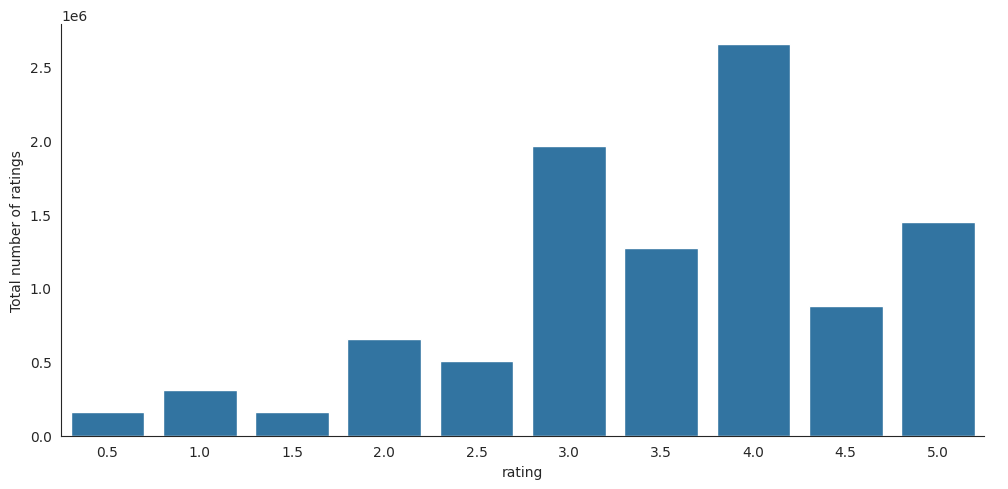

In [5]:
with sns.axes_style('white'):
    g = sns.catplot(data=df_train, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df_train["rating"])}')

In [4]:
users = df_train['userId'].unique()

# Get a random sample of users
sample_users = np.random.choice(users, size=int(0.5 * len(users)), replace=False)

# Get the rows corresponding to the sampled users
df_sample = df_train[df_train['userId'].isin(sample_users)]

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997009 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 190.6 MB


Average rating in dataset: 3.5336428512689264


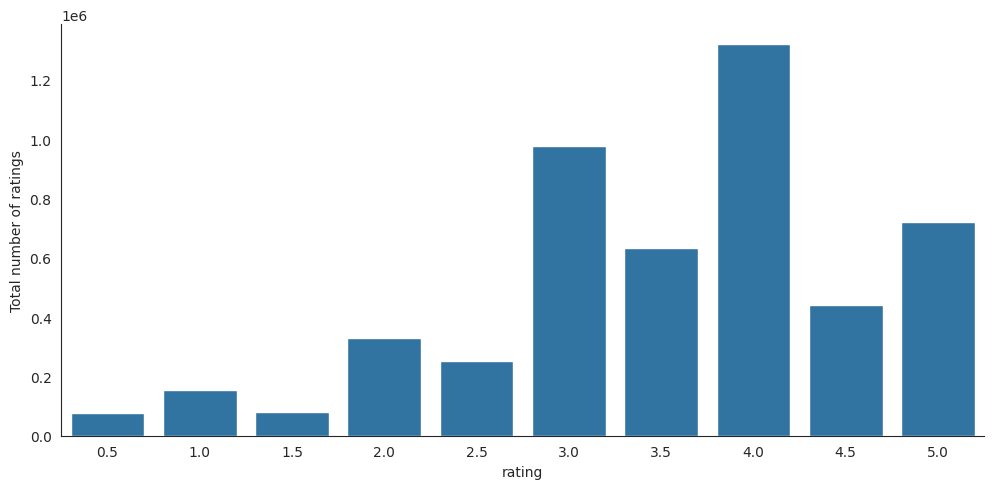

In [7]:
with sns.axes_style('white'):
    g = sns.catplot(data=df_sample, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df_sample["rating"])}')

In [5]:
df_trainv1 = pd.merge(df_sample, df_movies, on='movieId')

df_trainv2 = df_trainv1[['userId', 'movieId',	'title','rating',	'timestamp']]

df_trainv2.head()

,userId,movieId,title,rating,timestamp
0,5163,57669,In Bruges (2008),4.0,1518349992
1,137050,57669,In Bruges (2008),4.0,1425631854
2,120490,57669,In Bruges (2008),4.5,1408228517
3,99887,57669,In Bruges (2008),0.5,1448839196
4,847,57669,In Bruges (2008),3.5,1232893563


In [6]:
df_trainv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997009 entries, 0 to 4997008
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   title      object 
 3   rating     float64
 4   timestamp  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 228.7+ MB


In [7]:
merged_df = pd.merge(df_movies, df_imdb_data, on='movieId')

final_df = merged_df[['movieId', 'title', 'title_cast', 'genres', 'director', 'runtime', 'budget',	'plot_keywords']]

final_df.head()

,movieId,title,title_cast,genres,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Adventure|Children|Fantasy,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Comedy|Romance,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Whitney Houston|Angela Bassett|Loretta Devine|...,Comedy|Drama|Romance,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Steve Martin|Diane Keaton|Martin Short|Kimberl...,Comedy,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [8]:
final_df['director_titlecast'] = (pd.Series(final_df[['director', 'title_cast']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

titles = final_df['title']
indices = pd.Series(final_df.index, index=final_df['title'])

In [9]:
indices.head()

title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

In [10]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns
tf_movietags_matrix = tf.fit_transform(final_df['director_titlecast'])

In [11]:
cosine_sim_movietags = cosine_similarity(tf_movietags_matrix,
                                        tf_movietags_matrix)
print (cosine_sim_movietags.shape)

(24866, 24866)


In [12]:
cosine_sim_movietags[:5]

array([[1.        , 0.        , 0.00481673, ..., 0.00606498, 0.00317293,
        0.01385015],
       [0.        , 1.        , 0.00251314, ..., 0.        , 0.        ,
        0.        ],
       [0.00481673, 0.00251314, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01596706, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00451436, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_movietags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles
    return titles.iloc[book_indices]

In [17]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

3020                                    Toy Story 2 (1999)
14758                                   Toy Story 3 (2010)
23079              Toy Story Toons: Partysaurus Rex (2012)
22140                    Toy Story Toons: Small Fry (2011)
22139            Toy Story Toons: Hawaiian Vacation (2011)
20294                           Toy Story of Terror (2013)
23081                    Toy Story That Time Forgot (2014)
10314    After School Special (a.k.a. Barely Legal) (2003)
20452                                 Tim's Vermeer (2013)
Name: title, dtype: object

In [100]:
content_generate_top_N_recommendations("Jumanji (1995)", N=10)

23134    Robin Williams: Weapons of Self Destruction (2...
3413                                   Return to Me (2000)
4680                                Little Man Tate (1991)
19327                             Unspeakable Acts (1990) 
2016     Halloween H20: 20 Years Later (Halloween 7: Th...
4062                                     15 Minutes (2001)
4969                   Adventures of Huck Finn, The (1993)
1575                                 Ice Storm, The (1997)
630                                      Diabolique (1996)
Name: title, dtype: object

In [101]:
content_generate_top_N_recommendations("Father of the Bride Part II (1995)", N=10)

6818            Father of the Bride (1991)
19824                  Scenic Route (2013)
1493               War at Home, The (1996)
5857                        My Girl (1991)
9889     Jiminy Glick in La La Wood (2004)
6099        Bringing Down the House (2003)
1699                   Mass Transit (1998)
11244               We Are Marshall (2006)
10647             Failure to Launch (2006)
Name: title, dtype: object

In [14]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values

    # Gather the similarity ratings between each book the user has rated
    # and the reference book
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_movietags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and
    # user item ratings.
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user.
        # We use the average rating for the reference item as a proxy in this case
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [15]:
df_trainv2[df_trainv2['userId'] == 5163][3:10]

,userId,movieId,title,rating,timestamp
494681,5163,344,Ace Ventura: Pet Detective (1994),4.0,1434310195
630148,5163,441,Dazed and Confused (1993),4.0,1518292657
827316,5163,1210,Star Wars: Episode VI - Return of the Jedi (1983),5.0,1434309930
1028193,5163,2167,Blade (1998),3.5,1434309989
1039645,5163,223,Clerks (1994),5.0,1434310150
1134529,5163,2571,"Matrix, The (1999)",3.0,1433857955
1483746,5163,51255,Hot Fuzz (2007),4.0,1434622012


In [16]:
title = "In Bruges (2008)"
actual_rating = df_trainv2[(df_trainv2['userId'] == 5163) & (df_trainv2['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=5163, rating_data=df_trainv2)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - In Bruges (2008)
---
Actual rating: 		 4.0
Predicted rating: 	 4.0156328823355585


In [106]:
title = "True Lies (1994)"
actual_rating = df_trainv2[(df_trainv2['userId'] == 5163) & (df_trainv2['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=5163, rating_data=df_trainv2)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - True Lies (1994)
---
Actual rating: 		 4.0
Predicted rating: 	 4.0216635715195945


# **Surprise SVD Model Performance:**

In [20]:
from surprise import Dataset, Reader

from surprise.model_selection import train_test_split

from surprise import SVD

from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_trainv2[['userId', 'movieId', 'rating']], reader)

trainsnet, testset = train_test_split(data, test_size=0.2)

model = SVD()

model.fit(trainsnet)

predictions = model.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8464


0.8464051703908102

# **Cross validation Model:**

In [15]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_trainv2[['userId', 'movieId', 'rating']], reader)

model = SVD()

# Perform 5-fold cross-validation
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

# cv_results is a dictionary with keys 'test_rmse', 'fit_time', 'test_time'
mean_rmse = cv_results['test_rmse'].mean()  # get mean RMSE
print(f"Mean RMSE: {mean_rmse}")

KeyboardInterrupt: 

# **Predict on the test data and create CSV file**

In [ ]:
test_pred = []

for row in df_test.itertuples():
  user_Id = row.userId
  movie_Id = row.movieId
  prediction = model.predict(user_Id, movie_Id).est
  test_pred.append({'Id': f"{user_Id}_{movie_Id}",'rating':prediction})

sub_df = pd.DataFrame(test_pred)

sub_df.to_csv('submit.csv', index=False, float_format='%.1f')

In [23]:
predictions = model.test()

new_data = []


for pred in predictions:
    id = str(pred.uid) + '_' + str(pred.iid)
    new_data.append([id, pred.est])

df_predictions = pd.DataFrame(new_data, columns=['Id', 'rating'])

print(df_predictions)

ValueError: too many values to unpack (expected 3)

In [24]:
# Assuming 'df_test' is your DataFrame with columns 'userId', 'movieId'
reader = Reader(rating_scale=(1, 5))  # rating_scale can be any range, it's not used here

# As df_test doesn't have a 'rating' column, we can create a dummy one
df_test['rating'] = np.zeros(len(df_test))  # create a column of zeros

data_test = Dataset.load_from_df(df_test[['userId', 'movieId', 'rating']], reader)

# Build the testset from the entire data_test Dataset
testset_df_test = data_test.build_full_trainset().build_testset()

# Use the trained model to make predictions on df_test
predictions_df_test = model.test(testset_df_test)

new_data = []
for pred in predictions_df_test:
    id = str(pred.uid) + '_' + str(pred.iid)
    new_data.append([id, pred.est])

df_predictions_df_test = pd.DataFrame(new_data, columns=['Id', 'rating'])

print(df_predictions_df_test)

                  Id    rating
0             1_2011  3.332211
1             1_4144  4.061879
2             1_5767  3.405811
3             1_6711  3.701702
4             1_7318  3.019453
...              ...       ...
5000014  162541_4079  3.536775
5000015  162541_4467  3.764627
5000016  162541_4980  3.187451
5000017  162541_5689  3.247101
5000018  162541_7153  4.043714

[5000019 rows x 2 columns]


In [25]:
df_predictions_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Id      object 
 1   rating  float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB


In [26]:
df_predictions_df_test.to_csv('pred.csv', index=False)